<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT/BERT_STS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 데이터 불러오기

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/Pytorch \NLP/BERT/data_in/KorNLUDatasets/KorSTS

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/KorNLUDatasets/KorSTS


In [ ]:
ls

sts-dev.tsv  sts-test.tsv  sts-train.tsv


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('sts-train.tsv',sep='\t',quoting=3)
train_df

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.
...,...,...,...,...,...,...,...
5744,main-news,headlines,2016,1456,0.00,폭풍우 클로다흐가 영국을 강타하면서 심한 강풍,메르켈은 나토와 라트비아의 연대를 약속한다.
5745,main-news,headlines,2016,1465,0.00,리비아 테러리스트들이 공습에 대한 복수로 찍은 수십 명의 이집트 인질들,나일강에서 더 많은 시체가 발견되면서 이집트 보트 충돌 사고 사망자 수가 증가한다.
5746,main-news,headlines,2016,1466,0.00,바레인으로 향하는 대통령,시 주석 : 에볼라 퇴치를 계속 돕기 위한 중국
5747,main-news,headlines,2016,1470,0.00,"중국, 인도는 양국 관계를 증진시키겠다고 맹세한다",중국은 불안한 주식 거래자들을 안심시키기 위해 뒤뚱거리고 있다.


## Transformers의 BertTokenizer 불러오기

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00


In [ ]:
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [ ]:
cache_dir = '.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba'

## 문장 길이 분석

In [ ]:
# 두 sentence 합치기

sentence = pd.Series(train_df.sentence1.astype(str).tolist()+ train_df.sentence2.astype(str).tolist())
sentence

0                                         비행기가 이륙하고 있다.
1                                 한 남자가 큰 플루트를 연주하고 있다.
2                                한 남자가 피자에 치즈를 뿌려놓고 있다.
3                                      세 남자가 체스를 하고 있다.
4                                    한 남자가 첼로를 연주하고 있다.
                              ...                      
11493                          메르켈은 나토와 라트비아의 연대를 약속한다.
11494    나일강에서 더 많은 시체가 발견되면서 이집트 보트 충돌 사고 사망자 수가 증가한다.
11495                        시 주석 : 에볼라 퇴치를 계속 돕기 위한 중국
11496               중국은 불안한 주식 거래자들을 안심시키기 위해 뒤뚱거리고 있다.
11497                 가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망
Length: 11498, dtype: object

In [ ]:
sen_len = sentence.apply(lambda x : len(tokenizer.tokenize(x)))
sen_len

0         8
1        12
2        15
3         8
4        11
         ..
11493    17
11494    29
11495    14
11496    23
11497    22
Length: 11498, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

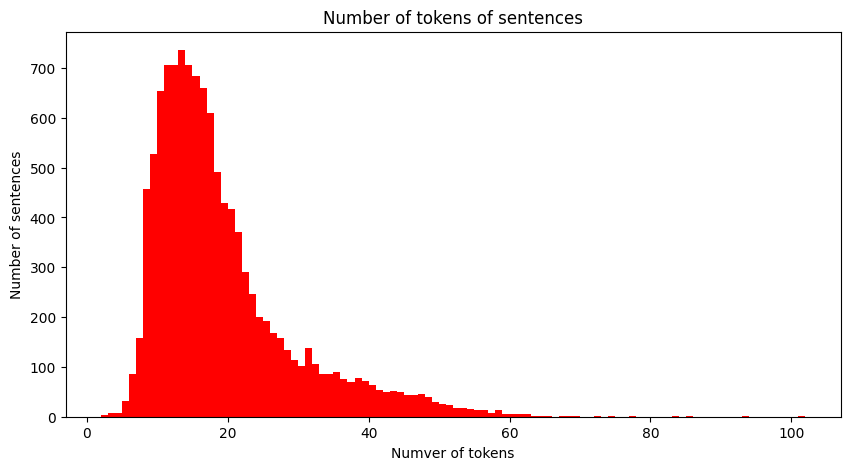

In [ ]:
# histogram

plt.figure(figsize=(10,5))

plt.hist(sen_len, bins=100,color='r')

plt.title('Number of tokens of sentences')
plt.xlabel('Numver of tokens')
plt.ylabel('Number of sentences')
plt.show()

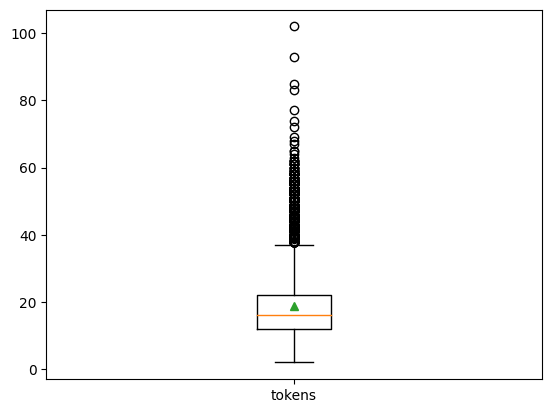

In [ ]:
# boxplot

plt.boxplot(sen_len,labels=['tokens'],showmeans=True)
plt.show()

In [ ]:
import numpy as np

In [ ]:
# statistic
print('최대 길이 : {}'.format(np.max(sen_len)))
print('최소 길이 : {}'.format(np.min(sen_len)))
print('평균 길이 : {:.2f}'.format(np.mean(sen_len)))
print('중간 길이 : {:.2f}'.format(np.median(sen_len)))
print('1 사분위 길이 : {}'.format(np.percentile(sen_len,25)))
print('3 사분위 길이 : {}'.format(np.percentile(sen_len,75))) # => 채택

최대 길이 : 102
최소 길이 : 2
평균 길이 : 18.74
중간 길이 : 16.00
1 사분위 길이 : 12.0
3 사분위 길이 : 22.0


MAX_LEN = 22*2 = 44

## LABEL

<Axes: >

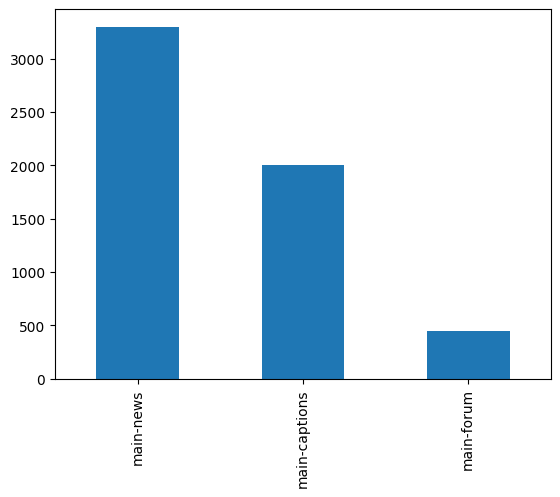

In [ ]:
train_df.genre.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

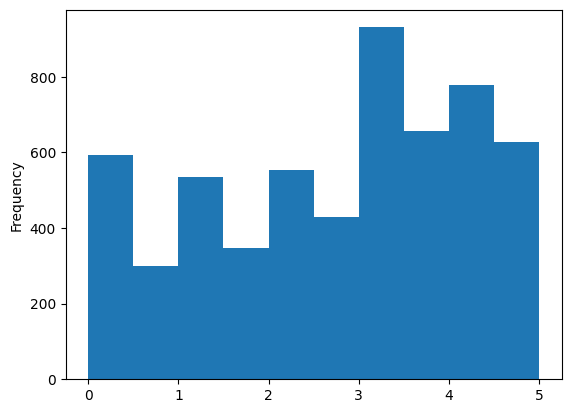

In [ ]:
train_df.score.plot(kind='hist')

살짝 불균형이 있기는 하지만 심하지 않다

# 데이터 전처리

## Transformers의 BertTokenizer 불러오기

In [5]:
!pip install transformers

In [6]:
from transformers import *

In [7]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "l

In [8]:
cache_dir = '.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba'

## 전처리

In [9]:
import pandas as pd

In [10]:
cd drive/MyDrive/Pytorch \NLP/BERT/data_in/KorNLUDatasets/KorSTS

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/KorNLUDatasets/KorSTS


In [11]:
ls

sts-dev.tsv  sts-test.tsv  sts-train.tsv


In [12]:
train_df = pd.read_csv('sts-train.tsv',sep='\t',quoting=3)

In [13]:
val_df = pd.read_csv('sts-dev.tsv',sep='\t',quoting=3)

In [14]:
test_df = pd.read_csv('sts-test.tsv',sep='\t',quoting=3)

In [ ]:
print('train : {} | val : {} | test : {}'.format(len(train_df),len(val_df),len(test_df)))

train : 5749 | val : 1500 | test : 1379


In [15]:
import torch

In [16]:
# hyperparameters

MAX_LEN = 22*2
BATCH_SIZE = 32
VALID_SPLIT = 0.2
EPOCH = 3

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 특수문자 제거

In [ ]:
train_df.head()

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.


In [17]:
train_df['sentence1']=train_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
train_df['sentence2']=train_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')

<ipython-input-17-d28615a25845>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['sentence1']=train_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
<ipython-input-17-d28615a25845>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['sentence2']=train_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')


In [ ]:
train_df.head()

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,비행기가 이륙하고 있다,비행기가 이륙하고 있다
1,main-captions,MSRvid,2012test,4,3.80,한 남자가 큰 플루트를 연주하고 있다,남자가 플루트를 연주하고 있다
2,main-captions,MSRvid,2012test,5,3.80,한 남자가 피자에 치즈를 뿌려놓고 있다,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다
3,main-captions,MSRvid,2012test,6,2.60,세 남자가 체스를 하고 있다,두 남자가 체스를 하고 있다
4,main-captions,MSRvid,2012test,9,4.25,한 남자가 첼로를 연주하고 있다,자리에 앉은 남자가 첼로를 연주하고 있다


In [18]:
val_df['sentence1']=val_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
val_df['sentence2']=val_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')

<ipython-input-18-2376c19bb5de>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  val_df['sentence1']=val_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
<ipython-input-18-2376c19bb5de>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  val_df['sentence2']=val_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')


In [19]:
test_df['sentence1']=test_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
test_df['sentence2']=test_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')

<ipython-input-19-be3a4d42127e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['sentence1']=test_df['sentence1'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')
<ipython-input-19-be3a4d42127e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['sentence2']=test_df['sentence2'].astype(str).str.replace('[^a-zA-Z0-9ㄱ-ㅣ가-힣\\s]',' ')


In [ ]:
test_df.head()

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,24,2.5,한 소녀가 머리를 스타일링하고 있다,한 소녀가 머리를 빗고 있다
1,main-captions,MSRvid,2012test,33,3.6,한 무리의 남자들이 해변에서 축구를 한다,한 무리의 소년들이 해변에서 축구를 하고 있다
2,main-captions,MSRvid,2012test,45,5.0,한 여성이 다른 여성의 발목을 재고 있다,한 여자는 다른 여자의 발목을 측정한다
3,main-captions,MSRvid,2012test,63,4.2,한 남자가 오이를 자르고 있다,한 남자가 오이를 자르고 있다
4,main-captions,MSRvid,2012test,66,1.5,한 남자가 하프를 연주하고 있다,한 남자가 키보드를 연주하고 있다


### Tokenizer를 이용한 BERT INPUT 생성

https://huggingface.co/docs/transformers/v4.30.0/en/internal/tokenization_utils#transformers.PreTrainedTokenizerBase.from_pretrained

In [20]:
def bert_tokenizer(sent1,sent2,MAX_LEN):

  encoded_dict = tokenizer.encode_plus(sent1,
                                       sent2,
                                       add_special_tokens=True,
                                       padding ='max_length',
                                       truncation=True,
                                       max_length =MAX_LEN,
                                       return_attention_mask=True,
                                       return_token_type_ids=True)

  return encoded_dict['input_ids'], encoded_dict['attention_mask'], encoded_dict['token_type_ids']

In [21]:
# BERT input 생성 함수


def Bert_input(df):

  input_ids=[]
  attention_mask=[]
  token_type_ids=[]
  labels=[]

  for sent1, sent2, label in zip(df['sentence1'],df['sentence2'],df['score']):

    i_ids, attn_m, t_t_ids = bert_tokenizer(sent1,sent2,MAX_LEN)
    input_ids.append(i_ids)
    attention_mask.append(attn_m)
    token_type_ids.append(t_t_ids)

    labels.append(label)

  input_ids=torch.LongTensor(input_ids)
  attention_mask=torch.LongTensor(attention_mask)
  token_type_ids=torch.LongTensor(token_type_ids)
  labels=torch.Tensor(labels)

  bert_input=(input_ids, attention_mask, token_type_ids)

  return bert_input,labels

In [22]:
import transformers
transformers.logging.set_verbosity_error()

In [23]:
train_inputs, train_labels = Bert_input(train_df)
val_inputs, val_labels = Bert_input(val_df)
test_inputs, test_labels = Bert_input(test_df)

In [23]:
train_inputs, train_labels

((tensor([[  101,  9379, 25549,  ...,     0,     0,     0],
          [  101,  9954, 76854,  ...,     0,     0,     0],
          [  101,  9954, 76854,  ...,     0,     0,     0],
          ...,
          [  101,  9318, 56645,  ...,     0,     0,     0],
          [  101, 45397,  9640,  ...,     0,     0,     0],
          [  101,  9935, 90833,  ...,     0,     0,     0]]),
  tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0]]),
  tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]])),
 tensor([5.0000, 3.8000, 3.8000,  ..., 0.0000, 0.0000, 0.0000]))

In [ ]:
val_inputs, val_labels

((tensor([[   101,   9521,  16617,  ...,      0,      0,      0],
          [   101, 106320,  16985,  ...,      0,      0,      0],
          [   101,   9954,  76854,  ...,      0,      0,      0],
          ...,
          [   101,   9580, 119144,  ...,    102,      0,      0],
          [   101,   9580,  42144,  ...,    102,      0,      0],
          [   101,  39773,   9379,  ...,  20595,    102,      0]]),
  tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 0, 0],
          [1, 1, 1,  ..., 1, 0, 0],
          [1, 1, 1,  ..., 1, 1, 0]]),
  tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 1, 0, 0],
          [0, 0, 0,  ..., 1, 0, 0],
          [0, 0, 0,  ..., 1, 1, 0]])),
 tensor([5.0000, 4.7500, 5.0000,  ..., 2.0000, 0.0000, 0.0000]))

In [ ]:
test_inputs, test_labels

((tensor([[   101,   9954,   9448,  ...,      0,      0,      0],
          [   101,   9954,   9294,  ...,      0,      0,      0],
          [   101,   9954, 100006,  ...,      0,      0,      0],
          ...,
          [   101,   9379, 118958,  ...,      0,      0,      0],
          [   101, 103596,   9998,  ...,  22440,  19905,    102],
          [   101,  48556,  10892,  ...,      0,      0,      0]]),
  tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 0, 0, 0]]),
  tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 1, 1, 1],
          [0, 0, 0,  ..., 0, 0, 0]])),
 tensor([2.5000, 3.6000, 5.0000,  ..., 1.0000, 0.0000, 0.0000]))

## Dataset, DataLoader

In [24]:
from torch.utils.data import Dataset,DataLoader

In [25]:
class Custom_dataset(Dataset):

  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __getitem__(self, index) :
    return {'input_ids':self.x[0][index], 'attention_mask':self.x[1][index], 'token_type_ids':self.x[2][index], 'labels':self.y[index]}

  def __len__(self):
    return self.y.size()[0]

In [26]:
train_dataset=Custom_dataset(train_inputs,train_labels)
val_dataset=Custom_dataset(val_inputs,val_labels)
test_dataset=Custom_dataset(test_inputs,test_labels)

In [ ]:
train_dataset.__getitem__(1)

{'input_ids': tensor([   101,   9954,  76854,  11287,   9835,   9944,  35866, 101825,   9568,
          16323,  12453,  11506,    102,  76854,  11287,   9944,  35866, 101825,
           9568,  16323,  12453,  11506,    102,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(3.8000)}

In [27]:
# hyperparameters

MAX_LEN = 22*2
BATCH_SIZE = 32
VALID_SPLIT = 0.2
EPOCH = 3

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [27]:
train_iter = DataLoader(train_dataset,BATCH_SIZE)
val_iter = DataLoader(val_dataset,BATCH_SIZE)
test_iter = DataLoader(test_dataset,BATCH_SIZE)

In [32]:
batch=next(iter(train_iter))
batch

{'input_ids': tensor([[  101,  9379, 25549,  ...,     0,     0,     0],
         [  101,  9954, 76854,  ...,     0,     0,     0],
         [  101,  9954, 76854,  ...,     0,     0,     0],
         ...,
         [  101,  9954,  9448,  ...,     0,     0,     0],
         [  101,  9954, 76854,  ...,     0,     0,     0],
         [  101, 76854, 11287,  ...,     0,     0,     0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'labels': tensor([5.0000, 3.8000, 3.8000, 2.6000, 4.2500, 4.2500, 0.5000, 1.6000, 2.2000,
         5.0000, 4.2000, 4.6000, 3.867

# 모델 구현

In [28]:
import torch
import torch.nn as nn

In [29]:
class Bert_sts(nn.Module):

  def __init__(self,cache_dir,num_class):
    super(Bert_sts,self).__init__()

    self.bert = BertModel.from_pretrained('bert-base-multilingual-cased',cache_dir)
    self.dropout = nn.Dropout(self.bert.config.hidden_dropout_prob) # 0.1
    self.dense = nn.Linear(self.bert.config.hidden_size, num_class) # 768 -> 1
    nn.init.trunc_normal_(self.dense.weight.data, std=self.bert.config.initializer_range) # 0.01

  def forward(self,input_ids,attention_mask,token_type_ids):

    outputs = self.bert(input_ids,attention_mask,token_type_ids) # ( batch_size, max_len, hidden_dim )
    droped = self.dropout(outputs[1]) # ( batch_size, hidden_dim )
    predict = self.dense(droped) # ( batch_size, 1)
    predict = predict.squeeze(-1)  # ( batch_size )

    return predict # ( batch_size )

In [30]:
# compile

model = Bert_sts(cache_dir,1)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)
criterion = nn.MSELoss()

In [34]:
model(batch['input_ids'],batch['attention_mask'],batch['token_type_ids'])

tensor([-0.0142, -0.2512, -0.4446, -0.3342, -0.4386, -0.2674, -0.4999, -0.3548,
        -0.4706, -0.2862,  0.0762, -0.6181, -0.4140, -0.5018, -0.4853, -0.2898,
        -0.4078, -0.4074, -0.4025,  0.2907, -0.3947, -0.3634, -0.2522, -0.4257,
        -0.4512, -0.2907, -0.5035, -0.2648, -0.5415, -0.4768, -0.2767, -0.3018],
       grad_fn=<SqueezeBackward1>)

# 학습 - 검증 - 학습완료 - 테스트

## 학습

In [35]:
from tqdm import tqdm

In [36]:
def train(model,optimizer,criterion,train_iter):
  model.train()

  for batch in tqdm(train_iter, desc = 'training'):
    x0 = batch['input_ids'].to(device) # ( batch_size, max_len)
    x1 = batch['attention_mask'].to(device) # ( batch_size, max_len)
    x2 = batch['token_type_ids'].to(device) # ( batch_size, max_len)
    y = batch['labels'].to(device) # ( batch_size )

    predict = model(x0,x1,x2) # ( batch_size )
    loss = criterion(predict,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## 검증

피어슨 상관계수
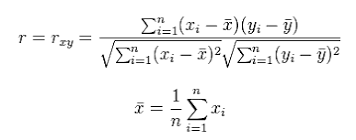

In [37]:
def Pearson_correlation(x,y):
  x_ = x-x.mean()
  y_ = y-y.mean()

  cov = (x_ * y_).sum()
  stds = (x_.square().sum() * y_.square().sum()).sqrt() + 1e-12

  return cov / stds

In [51]:
a= torch.Tensor([1,2,3,4,5,6,7])
b= torch.Tensor([2,2,3,4,5,6,7])

Pearson_correlation(a,b)

tensor(0.9882)

In [39]:
def evaluation(model,criterion,val_iter):
  model.eval()

  total_loss = 0
  pred = []
  tar = []

  for batch in tqdm(val_iter, desc='evaluation'):
    x0 = batch['input_ids'].to(device) # ( batch_size, max_len)
    x1 = batch['attention_mask'].to(device) # ( batch_size, max_len)
    x2 = batch['token_type_ids'].to(device) # ( batch_size, max_len)
    y = batch['labels'].to(device) # ( batch_size )

    predict = model(x0,x1,x2) # ( batch_size )
    loss = criterion(predict,y)
    total_loss+=loss

    pred.extend(predict.tolist())
    tar.extend(y.tolist())

  pearson_score = Pearson_correlation(torch.Tensor(pred),torch.Tensor(tar))
  avg_loss = loss / len(val_iter)

  return avg_loss, pearson_score

## 학습 완료

In [40]:
# hyperparameters

MAX_LEN = 22*2
BATCH_SIZE = 32
VALID_SPLIT = 0.2
EPOCH = 3

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [41]:
import os

In [42]:
best_pearson_correlation = None

for e in range(EPOCH):
  train(model,optimizer,criterion,train_iter)
  avg_loss, pearson_score = evaluation(model,criterion,val_iter)

  print(f' avg_loss : {avg_loss} | pearon_correlation : {pearon_score}')

  if not best_pearson_correlation or pearson_score > best_pearson_correlation:
    os.makedirs('best_weight',exist_ok=True)
    torch.save(model.state_dict(),'./best_weight/bert_sts_best_weight.pt')
    best_pearson_correlation = pearson_score

training:   3%|▎         | 5/180 [01:43<1:00:05, 20.60s/it]


KeyboardInterrupt: ignored

## 테스트

In [ ]:
model.load_state_dict(torch.load('./best_weight/bert_sts_best_weight.pt'))
avg_loss, pearson_score = evaluation(model,criterion,test_iter)
print(f' avg_loss : {avg_loss} | pearon_correlation : {pearon_score}')